In [1]:
from task_2 import *

from gridworld import *
from plot import *

import numpy as np
import matplotlib.pyplot as plt

import optuna

/Users/andrekestler/opt/anaconda3/envs/AI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(8)
np.random.seed(8)

# Monte Carlo Evaluation

In [3]:
# optimize hyperparameters of MC evaluation function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)
    
    env = Random(size=12, water=0.0, mountain=0.3)

    # hyperparameters to optimize
    max_episodes = 400    # We want to optimize the max_episodes, not the max_steps
    epsilon = 0.8       # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter
    
    max_steps = trial.suggest_int("max_steps", 1, 150)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 2, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 10, 100, step=10)

    # run sarsa function with hyperparameters
    Q, policy, cummulative_steps, cummulative_rewards = monteCarlo_evaluation(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate, decay_interval=decay_interval)

    average_reward = np.mean(cummulative_rewards)

    return average_reward

# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-15 10:41:07,240] A new study created in memory with name: no-name-64704153-c222-4f4e-ad62-a048cdbb6cea


[I 2023-11-15 10:41:07,360] Trial 0 finished with value: 11686.75 and parameters: {'max_steps': 57, 'gamma': 0.7000000000000001, 'alpha': 0.8, 'initialization': 70, 'decay_rate': 0.5, 'decay_interval': 30}. Best is trial 0 with value: 11686.75.
[I 2023-11-15 10:41:07,456] Trial 1 finished with value: 14793.5 and parameters: {'max_steps': 131, 'gamma': 0.1, 'alpha': 0.7000000000000001, 'initialization': 26, 'decay_rate': 0.25, 'decay_interval': 40}. Best is trial 1 with value: 14793.5.
[I 2023-11-15 10:41:07,514] Trial 2 finished with value: 0.0 and parameters: {'max_steps': 18, 'gamma': 0.6, 'alpha': 0.9, 'initialization': 82, 'decay_rate': 0.5, 'decay_interval': 70}. Best is trial 1 with value: 14793.5.
[I 2023-11-15 10:41:07,591] Trial 3 finished with value: 8003.0 and parameters: {'max_steps': 46, 'gamma': 0.7000000000000001, 'alpha': 0.9, 'initialization': 6, 'decay_rate': 0.5, 'decay_interval': 90}. Best is trial 1 with value: 14793.5.
[I 2023-11-15 10:41:07,728] Trial 4 finished 

### Best parameter from Optuna

In [4]:
# Print best parameter
study.best_params

{'max_steps': 145,
 'gamma': 0.6,
 'alpha': 0.4,
 'initialization': 0,
 'decay_rate': 0.75,
 'decay_interval': 10}

In [5]:
# Save dataframe to csv
df = study.trials_dataframe()
df.to_csv("/Users/andrekestler/Library/Mobile Documents/3L68KQB4HG~com~readdle~CommonDocuments/Documents/1. Semester/Deep Reinforcement Learning/Task1/src/Optuna_monteCarlo_evaluation.csv")

In [6]:
# Print best parameter with lowest max_steps and highest average reward
df = study.trials_dataframe()
df = df[df["value"] == df["value"].max()]
df = df.sort_values(by=["params_max_steps"], ascending=[True])
df.head(15)


number     value             datetime_start          datetime_complete  \
705      705  19359.75 2023-11-15 10:42:50.986775 2023-11-15 10:42:51.108634   
6633    6633  19359.75 2023-11-15 11:19:11.745656 2023-11-15 11:19:12.327867   
6609    6609  19359.75 2023-11-15 11:18:57.939133 2023-11-15 11:18:58.521701   
6585    6585  19359.75 2023-11-15 11:18:43.908821 2023-11-15 11:18:44.466477   
6552    6552  19359.75 2023-11-15 11:18:24.835386 2023-11-15 11:18:25.393011   
6540    6540  19359.75 2023-11-15 11:18:18.035226 2023-11-15 11:18:18.581227   
6531    6531  19359.75 2023-11-15 11:18:13.002379 2023-11-15 11:18:13.542269   
6498    6498  19359.75 2023-11-15 11:17:54.278777 2023-11-15 11:17:54.827971   
6490    6490  19359.75 2023-11-15 11:17:49.743094 2023-11-15 11:17:50.297847   
6478    6478  19359.75 2023-11-15 11:17:42.819735 2023-11-15 11:17:43.370567   
6646    6646  19359.75 2023-11-15 11:19:19.313150 2023-11-15 11:19:19.896997   
6465    6465  19359.75 2023-11-15 11:17:35.428218 2023-11-15 11:17:35.977997   
6455    6455  19359.75 2023-11-15 11:17:29.620910 2023-11-15 11:17:30.162367   
6443    6443  19359.75 2023-11-15 11:17:22.951533 2023-11-15 11:17:23.498664   
6439    6439  19359.75 2023-11-15 11:17:20.740832 2023-11-15 11:17:21.279343   

                   duration  params_alpha  params_decay_interval  \
705  0 days 00:00:00.121859           0.4                     10   
6633 0 days 00:00:00.582211           0.1                     10   
6609 0 days 00:00:00.582568           0.2                     10   
6585 0 days 00:00:00.557656           0.2                     10   
6552 0 days 00:00:00.557625           0.2                     10   
6540 0 days 00:00:00.546001           0.1                     10   
6531 0 days 00:00:00.539890           0.1                     10   
6498 0 days 00:00:00.549194           0.2                     10   
6490 0 days 00:00:00.554753           0.2                     10   
6478 0 days 00:00:00.550832           0.7                     10   
6646 0 days 00:00:00.583847           0.2                     10   
6465 0 days 00:00:00.549779           0.1                     10   
6455 0 days 00:00:00.541457           0.2                     10   
6443 0 days 00:00:00.547131           0.2                     10   
6439 0 days 00:00:00.538511           0.3                     10   

      params_decay_rate  params_gamma  params_initialization  \
705                0.75           0.6                      0   
6633               0.75           0.6                      0   
6609               1.00           0.2                      0   
6585               0.75           0.9                      0   
6552               0.75           0.9                      0   
6540               0.75           0.9                      0   
6531               0.75           0.9                      0   
6498               0.75           0.2                      0   
6490               1.25           0.3                      0   
6478               0.75           0.1                      0   
6646               0.75           0.7                      0   
6465               0.75           0.8                      0   
6455               0.75           0.9                      0   
6443               0.75           0.9                      0   
6439               0.75           0.7                      0   

      params_max_steps     state  
705                145  COMPLETE  
6633               145  COMPLETE  
6609               145  COMPLETE  
6585               145  COMPLETE  
6552               145  COMPLETE  
6540               145  COMPLETE  
6531               145  COMPLETE  
6498               145  COMPLETE  
6490               145  COMPLETE  
6478               145  COMPLETE  
6646               145  COMPLETE  
6465               145  COMPLETE  
6455               145  COMPLETE  
6443               145  COMPLETE  
6439               145  COMPLETE

In [7]:
best_param = df[df["params_max_steps"] == df["params_max_steps"].min()]
best_param

number     value             datetime_start          datetime_complete  \
705      705  19359.75 2023-11-15 10:42:50.986775 2023-11-15 10:42:51.108634   
6633    6633  19359.75 2023-11-15 11:19:11.745656 2023-11-15 11:19:12.327867   
6609    6609  19359.75 2023-11-15 11:18:57.939133 2023-11-15 11:18:58.521701   
6585    6585  19359.75 2023-11-15 11:18:43.908821 2023-11-15 11:18:44.466477   
6552    6552  19359.75 2023-11-15 11:18:24.835386 2023-11-15 11:18:25.393011   
...      ...       ...                        ...                        ...   
4071    4071  19359.75 2023-11-15 10:57:31.840053 2023-11-15 10:57:32.223254   
3595    3595  19359.75 2023-11-15 10:54:38.108421 2023-11-15 10:54:38.422448   
1366    1366  19359.75 2023-11-15 10:44:39.118377 2023-11-15 10:44:39.286434   
4039    4039  19359.75 2023-11-15 10:57:19.162287 2023-11-15 10:57:19.540415   
1045    1045  19359.75 2023-11-15 10:43:43.375052 2023-11-15 10:43:43.552335   

                   duration  params_alpha  params_decay_interval  \
705  0 days 00:00:00.121859           0.4                     10   
6633 0 days 00:00:00.582211           0.1                     10   
6609 0 days 00:00:00.582568           0.2                     10   
6585 0 days 00:00:00.557656           0.2                     10   
6552 0 days 00:00:00.557625           0.2                     10   
...                     ...           ...                    ...   
4071 0 days 00:00:00.383201           0.3                     10   
3595 0 days 00:00:00.314027           0.1                     10   
1366 0 days 00:00:00.168057           0.1                     10   
4039 0 days 00:00:00.378128           0.2                     10   
1045 0 days 00:00:00.177283           0.2                     10   

      params_decay_rate  params_gamma  params_initialization  \
705                0.75           0.6                      0   
6633               0.75           0.6                      0   
6609               1.00           0.2                      0   
6585               0.75           0.9                      0   
6552               0.75           0.9                      0   
...                 ...           ...                    ...   
4071               0.75           0.9                      2   
3595               1.00           0.6                      0   
1366               0.50           0.9                      0   
4039               0.75           0.9                      4   
1045               1.25           0.8                      0   

      params_max_steps     state  
705                145  COMPLETE  
6633               145  COMPLETE  
6609               145  COMPLETE  
6585               145  COMPLETE  
6552               145  COMPLETE  
...                ...       ...  
4071               145  COMPLETE  
3595               145  COMPLETE  
1366               145  COMPLETE  
4039               145  COMPLETE  
1045               145  COMPLETE  

[332 rows x 12 columns]

In [8]:
# Setup best parameter
MAX_EPISODES = 400
EPSILON = 0.8
MAX_STEPS = study.best_params["max_steps"]
GAMMA = study.best_params["gamma"]
ALPHA = study.best_params["alpha"]
INITIALIZATION = study.best_params["initialization"]
DECAY_RATE = study.best_params["decay_rate"]
DECAY_INTERVAL = study.best_params["decay_interval"]

print("MAX_EPISODES: ", MAX_EPISODES)
print("EPSILON: ", EPSILON)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)


MAX_EPISODES:  400
EPSILON:  0.8
MAX_STEPS:  145
GAMMA:  0.6
ALPHA:  0.4
INITIALIZATION:  0
DECAY_RATE:  0.75
DECAY_INTERVAL:  10


### Run environment 10 times

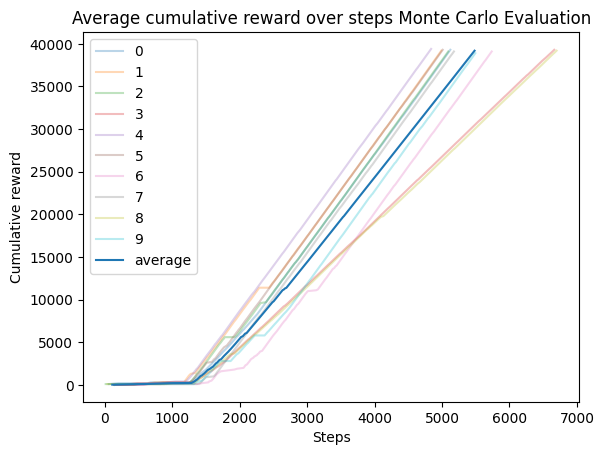

Monte Carlo Evaluation: Goal state is reachable with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] policies



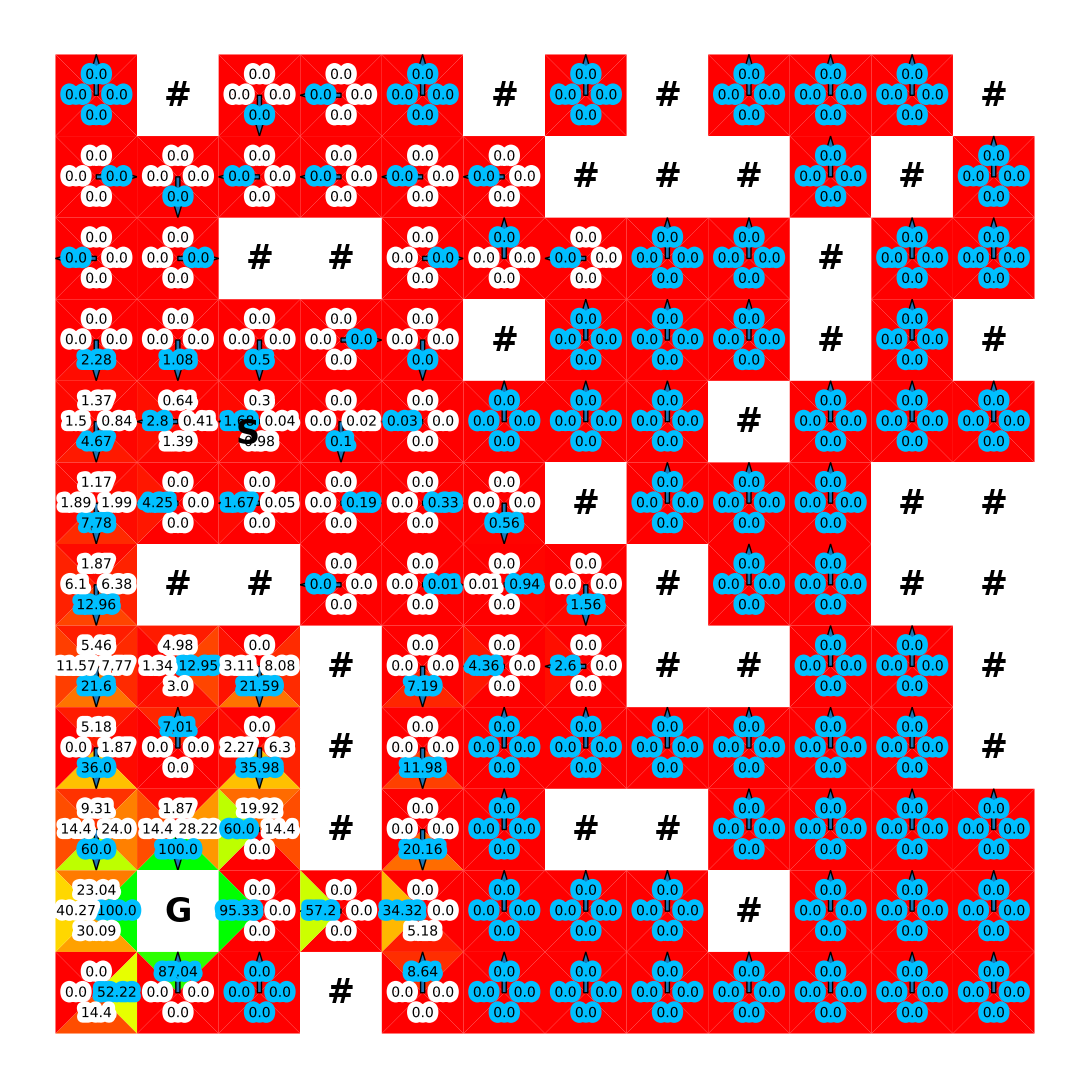

In [5]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.0, mountain=0.3)

lst_Q_table = []
lst_policy = []
lst_rewards = []
lst_steps = []

plt.figure()
for i in range(10):
    Q_table, policy, cummulative_steps, cummulative_rewards = monteCarlo_evaluation(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialization=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)

    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_rewards.append(cummulative_rewards)
    lst_steps.append(cummulative_steps)
    plt.plot(cummulative_steps, cummulative_rewards, label=str(i), alpha=0.3)

# Calculate the average cummulative reward and steps over all runs
average_reward = np.mean(lst_rewards, axis=0)
average_steps = np.mean(lst_steps, axis=0)

plt.plot(average_steps, average_reward, label="average", alpha=1.0)
plt.xlabel("Steps")
plt.ylabel("Cumulative reward")
plt.title("Average cumulative reward over steps " + "Monte Carlo Evaluation")
plt.legend()
plt.show()

# Check if all policies reach the goal state
index = check_goal_reachable_all_policies(env, lst_policy, "Monte Carlo Evaluation")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index[0]], lst_policy[index[0]])
plt.show()

# SARSA

In [11]:
# optimize hyperparameters of sarsa function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)
    
    env = Random(size=12, water=0.0, mountain=0.3)

    # hyperparameters to optimize
    max_episodes = 400  # trial.suggest_int("max_episodes", 100, 1000)
    epsilon = 0.8       # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter
    #max_steps = 100
    max_steps = trial.suggest_int("max_steps", 1, 150)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 3, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 10, 100, step=10)

    # run sarsa function with hyperparameters
    Q, policy, cummulative_steps, cummulative_rewards = sarsa(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate, decay_interval)

    average_reward = np.mean(cummulative_rewards)
    
    return average_reward


# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-15 11:59:56,717] A new study created in memory with name: no-name-de2db481-0650-43b6-85de-5fcc5b11a8cd
[I 2023-11-15 11:59:56,811] Trial 0 finished with value: 16266.0 and parameters: {'max_steps': 112, 'gamma': 0.30000000000000004, 'alpha': 0.4, 'initialization': 41, 'decay_rate': 1.5, 'decay_interval': 20}. Best is trial 0 with value: 16266.0.
[I 2023-11-15 11:59:56,884] Trial 1 finished with value: 14959.5 and parameters: {'max_steps': 148, 'gamma': 0.8, 'alpha': 0.7000000000000001, 'initialization': 90, 'decay_rate': 2.25, 'decay_interval': 70}. Best is trial 0 with value: 16266.0.
[I 2023-11-15 11:59:56,962] Trial 2 finished with value: 13705.0 and parameters: {'max_steps': 101, 'gamma': 0.1, 'alpha': 0.5, 'initialization': 81, 'decay_rate': 0.75, 'decay_interval': 70}. Best is trial 0 with value: 16266.0.
[I 2023-11-15 11:59:57,057] Trial 3 finished with value: 11204.75 and parameters: {'max_steps': 94, 'gamma': 0.9, 'alpha': 0.6, 'initialization': 89, 'decay_rate': 1.

### Best parameter from Optuna

In [12]:
# Print best parameter
study.best_params

{'max_steps': 71,
 'gamma': 0.9,
 'alpha': 0.8,
 'initialization': 30,
 'decay_rate': 3.0,
 'decay_interval': 10}

In [13]:
df = study.trials_dataframe()
df = df[df["value"] == df["value"].max()]
df = df.sort_values(by=["params_max_steps"], ascending=[True])
df.head(15)

number     value             datetime_start          datetime_complete  \
1680    1680  19260.75 2023-11-15 12:03:54.322268 2023-11-15 12:03:54.499855   
7249    7249  19260.75 2023-11-15 12:40:52.479448 2023-11-15 12:40:53.116854   
7226    7226  19260.75 2023-11-15 12:40:36.929073 2023-11-15 12:40:37.585667   
7213    7213  19260.75 2023-11-15 12:40:28.159354 2023-11-15 12:40:28.795708   
7202    7202  19260.75 2023-11-15 12:40:20.941324 2023-11-15 12:40:21.570351   
7188    7188  19260.75 2023-11-15 12:40:11.476404 2023-11-15 12:40:12.112540   
7171    7171  19260.75 2023-11-15 12:40:00.355933 2023-11-15 12:40:01.042138   
7128    7128  19260.75 2023-11-15 12:39:31.905387 2023-11-15 12:39:32.552017   
7112    7112  19260.75 2023-11-15 12:39:21.101728 2023-11-15 12:39:21.731425   
7102    7102  19260.75 2023-11-15 12:39:14.231361 2023-11-15 12:39:15.032971   
7066    7066  19260.75 2023-11-15 12:38:51.913426 2023-11-15 12:38:52.494844   
7061    7061  19260.75 2023-11-15 12:38:48.937500 2023-11-15 12:38:49.527734   
7041    7041  19260.75 2023-11-15 12:38:37.009741 2023-11-15 12:38:37.590256   
7026    7026  19260.75 2023-11-15 12:38:28.004999 2023-11-15 12:38:28.604618   
7006    7006  19260.75 2023-11-15 12:38:16.132866 2023-11-15 12:38:16.709636   

                   duration  params_alpha  params_decay_interval  \
1680 0 days 00:00:00.177587           0.8                     10   
7249 0 days 00:00:00.637406           0.8                     10   
7226 0 days 00:00:00.656594           0.8                     10   
7213 0 days 00:00:00.636354           0.8                     10   
7202 0 days 00:00:00.629027           0.8                     10   
7188 0 days 00:00:00.636136           0.9                     10   
7171 0 days 00:00:00.686205           0.8                     10   
7128 0 days 00:00:00.646630           0.8                     10   
7112 0 days 00:00:00.629697           0.8                     10   
7102 0 days 00:00:00.801610           0.8                     10   
7066 0 days 00:00:00.581418           0.8                     10   
7061 0 days 00:00:00.590234           0.8                     10   
7041 0 days 00:00:00.580515           0.8                     10   
7026 0 days 00:00:00.599619           0.9                     10   
7006 0 days 00:00:00.576770           0.8                     10   

      params_decay_rate  params_gamma  params_initialization  \
1680               3.00           0.9                     30   
7249               2.75           0.9                     16   
7226               3.00           0.9                     30   
7213               3.00           0.9                     23   
7202               3.00           0.8                     26   
7188               3.00           0.9                     18   
7171               3.00           0.9                     22   
7128               2.75           0.9                     17   
7112               3.00           0.9                     19   
7102               2.00           0.9                     17   
7066               3.00           0.8                     20   
7061               3.00           0.9                     10   
7041               2.25           0.9                     12   
7026               2.75           0.9                     26   
7006               3.00           0.9                     19   

      params_max_steps     state  
1680                71  COMPLETE  
7249                71  COMPLETE  
7226                71  COMPLETE  
7213                71  COMPLETE  
7202                71  COMPLETE  
7188                71  COMPLETE  
7171                71  COMPLETE  
7128                71  COMPLETE  
7112                71  COMPLETE  
7102                71  COMPLETE  
7066                71  COMPLETE  
7061                71  COMPLETE  
7041                71  COMPLETE  
7026                71  COMPLETE  
7006                71  COMPLETE

In [14]:
# Save dataframe to csv
df = study.trials_dataframe()
df.to_csv("/Users/andrekestler/Library/Mobile Documents/3L68KQB4HG~com~readdle~CommonDocuments/Documents/1. Semester/Deep Reinforcement Learning/Task1/src/Optuna_sarsa.csv")

In [15]:
# Setup best parameter
MAX_EPISODES = 400
EPSILON = 0.8
MAX_STEPS = study.best_params["max_steps"]
GAMMA = study.best_params["gamma"]
ALPHA = study.best_params["alpha"]
INITIALIZATION = study.best_params["initialization"]
DECAY_RATE = study.best_params["decay_rate"]
DECAY_INTERVAL = study.best_params["decay_interval"]

print("MAX_EPISODES: ", MAX_EPISODES)
print("EPSILON: ", EPSILON)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)

MAX_EPISODES:  400
EPSILON:  0.8
MAX_STEPS:  71
GAMMA:  0.9
ALPHA:  0.8
INITIALIZATION:  30
DECAY_RATE:  3.0
DECAY_INTERVAL:  10


### Run environment 10 times

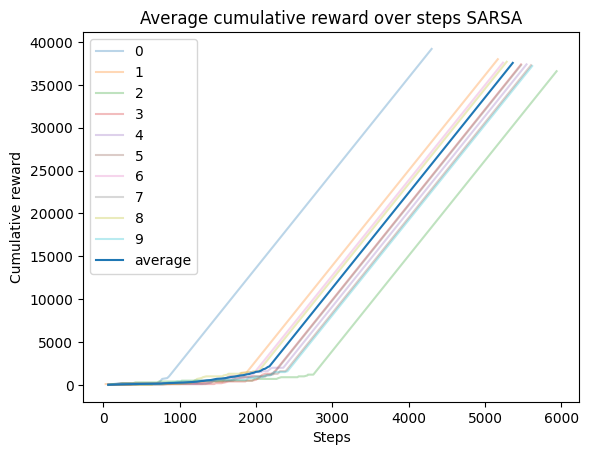

SARSA: Goal state is reachable with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] policies



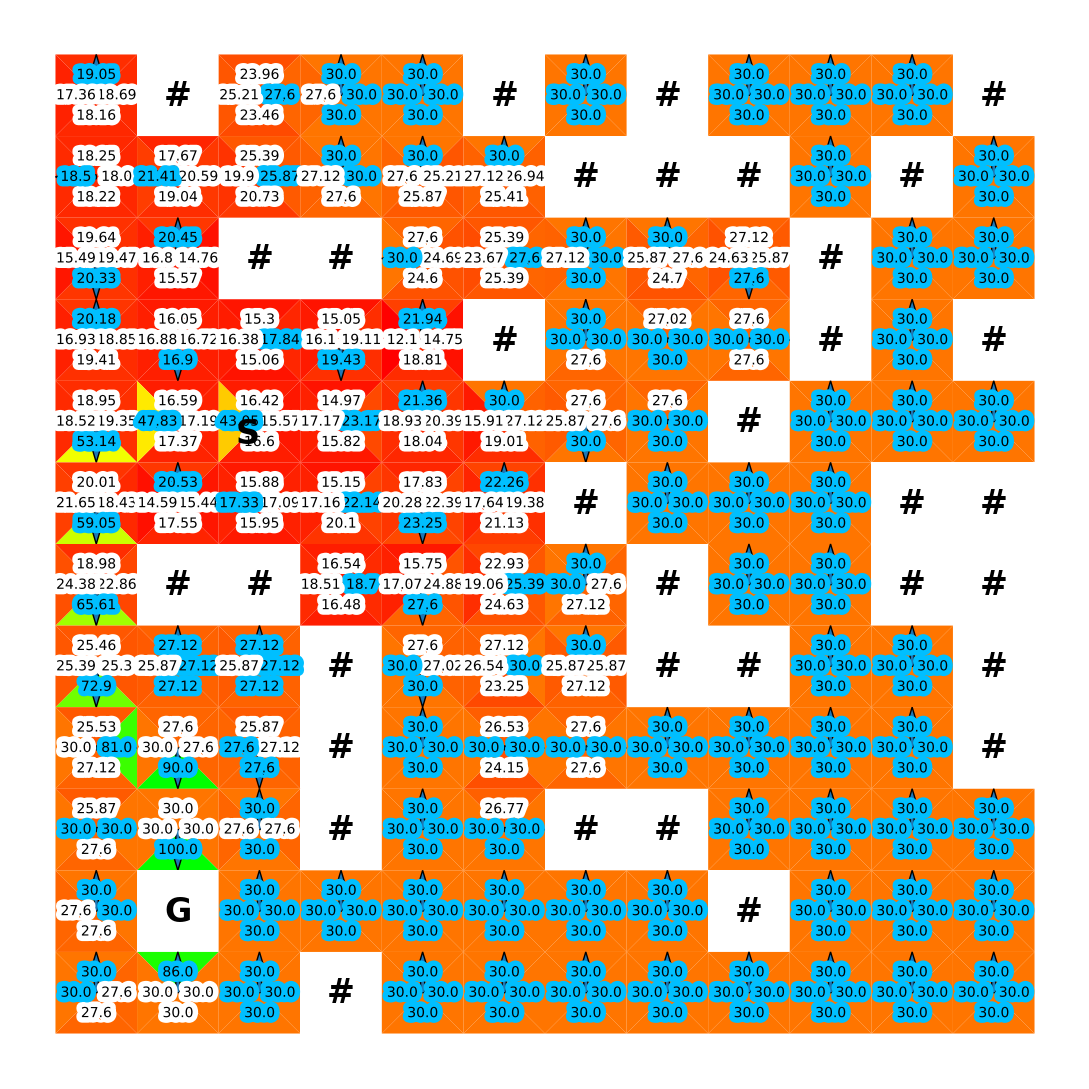

In [11]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.0, mountain=0.3)

lst_Q_table = []
lst_policy = []
lst_rewards = []
lst_steps = []

plt.figure()
for i in range(10):
    Q_table, policy, cummulative_steps, cummulative_rewards = sarsa(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialization=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)

    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_rewards.append(cummulative_rewards)
    lst_steps.append(cummulative_steps)
    plt.plot(cummulative_steps, cummulative_rewards, label=str(i), alpha=0.3)

# Calculate the average cummulative reward and steps over all runs
average_reward = np.mean(lst_rewards, axis=0)
average_steps = np.mean(lst_steps, axis=0)

plt.plot(average_steps, average_reward, label="average", alpha=1.0)
plt.xlabel("Steps")
plt.ylabel("Cumulative reward")
plt.title("Average cumulative reward over steps " + "SARSA")
plt.legend()
plt.show()

# Check if all policies reach the goal state
index = check_goal_reachable_all_policies(env, lst_policy, "SARSA")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index[0]], lst_policy[index[0]])
plt.show()

# Q-Learning

In [17]:
# optimize hyperparameters of sarsa function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)
    
    env = Random(size=12, water=0.0, mountain=0.3)

    # hyperparameters to optimize
    # max episode
    max_episodes = 400   # We want to optimize the max_steps, not the max_episodes
    epsilon = 0.8        # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter
    
    max_steps = trial.suggest_int("max_steps", 10, 100)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 3, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 10, 100, step=10)

    # run sarsa function with hyperparameters
    Q, policy, cummulative_steps, cummulative_rewards = qLearning(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate=decay_rate, decay_interval=decay_interval)

    average_reward = np.mean(cummulative_rewards)
    
    return average_reward

# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-15 13:17:16,336] A new study created in memory with name: no-name-f064a33b-cdc6-4a9a-b074-889eaf3a660f
[I 2023-11-15 13:17:16,423] Trial 0 finished with value: 7476.5 and parameters: {'max_steps': 20, 'gamma': 0.6, 'alpha': 0.4, 'initialization': 32, 'decay_rate': 3.0, 'decay_interval': 40}. Best is trial 0 with value: 7476.5.
[I 2023-11-15 13:17:16,511] Trial 1 finished with value: 14978.0 and parameters: {'max_steps': 96, 'gamma': 0.5, 'alpha': 0.7000000000000001, 'initialization': 92, 'decay_rate': 1.0, 'decay_interval': 50}. Best is trial 1 with value: 14978.0.
[I 2023-11-15 13:17:16,572] Trial 2 finished with value: 15326.25 and parameters: {'max_steps': 43, 'gamma': 0.4, 'alpha': 0.8, 'initialization': 21, 'decay_rate': 1.25, 'decay_interval': 30}. Best is trial 2 with value: 15326.25.
[I 2023-11-15 13:17:16,794] Trial 3 finished with value: 10509.25 and parameters: {'max_steps': 98, 'gamma': 0.8, 'alpha': 0.1, 'initialization': 93, 'decay_rate': 1.75, 'decay_interval'

### Best parameter from Optuna

In [18]:
# Print best parameter
study.best_params

{'max_steps': 100,
 'gamma': 0.8,
 'alpha': 0.7000000000000001,
 'initialization': 6,
 'decay_rate': 2.0,
 'decay_interval': 10}

In [19]:
df = study.trials_dataframe()
df = df[df["value"] == df["value"].max()]
df = df.sort_values(by=["params_max_steps"], ascending=[True])
df.head(15)

number    value             datetime_start          datetime_complete  \
8230    8230  18682.5 2023-11-15 14:12:53.161809 2023-11-15 14:12:53.879933   

                   duration  params_alpha  params_decay_interval  \
8230 0 days 00:00:00.718124           0.7                     10   

      params_decay_rate  params_gamma  params_initialization  \
8230                2.0           0.8                      6   

      params_max_steps     state  
8230               100  COMPLETE

In [20]:
# Save dataframe to csv
df = study.trials_dataframe()
df.to_csv("/Users/andrekestler/Library/Mobile Documents/3L68KQB4HG~com~readdle~CommonDocuments/Documents/1. Semester/Deep Reinforcement Learning/Task1/src/Optuna_qLearning.csv")

In [21]:
# Setup best parameter
MAX_EPISODES = 400
EPSILON = 0.8
MAX_STEPS = study.best_params["max_steps"]
GAMMA = study.best_params["gamma"]
ALPHA = study.best_params["alpha"]
INITIALIZATION = study.best_params["initialization"]
DECAY_RATE = study.best_params["decay_rate"]
DECAY_INTERVAL = study.best_params["decay_interval"]

print("MAX_EPISODES: ", MAX_EPISODES)
print("EPSILON: ", EPSILON)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)

MAX_EPISODES:  400
EPSILON:  0.8
MAX_STEPS:  100
GAMMA:  0.8
ALPHA:  0.7000000000000001
INITIALIZATION:  6
DECAY_RATE:  2.0
DECAY_INTERVAL:  10


### Run environment 10 times

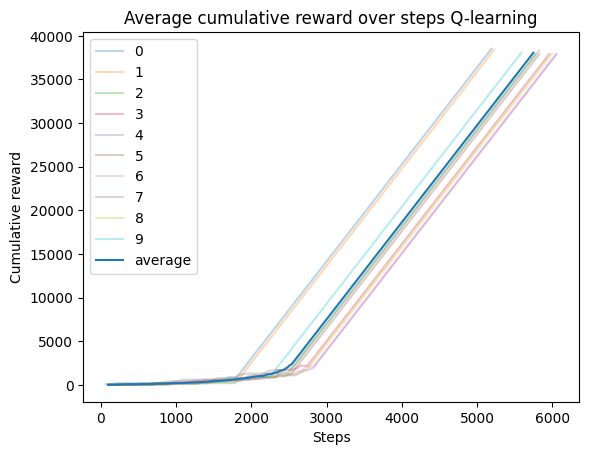

Q-learning: Goal state is reachable with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] policies



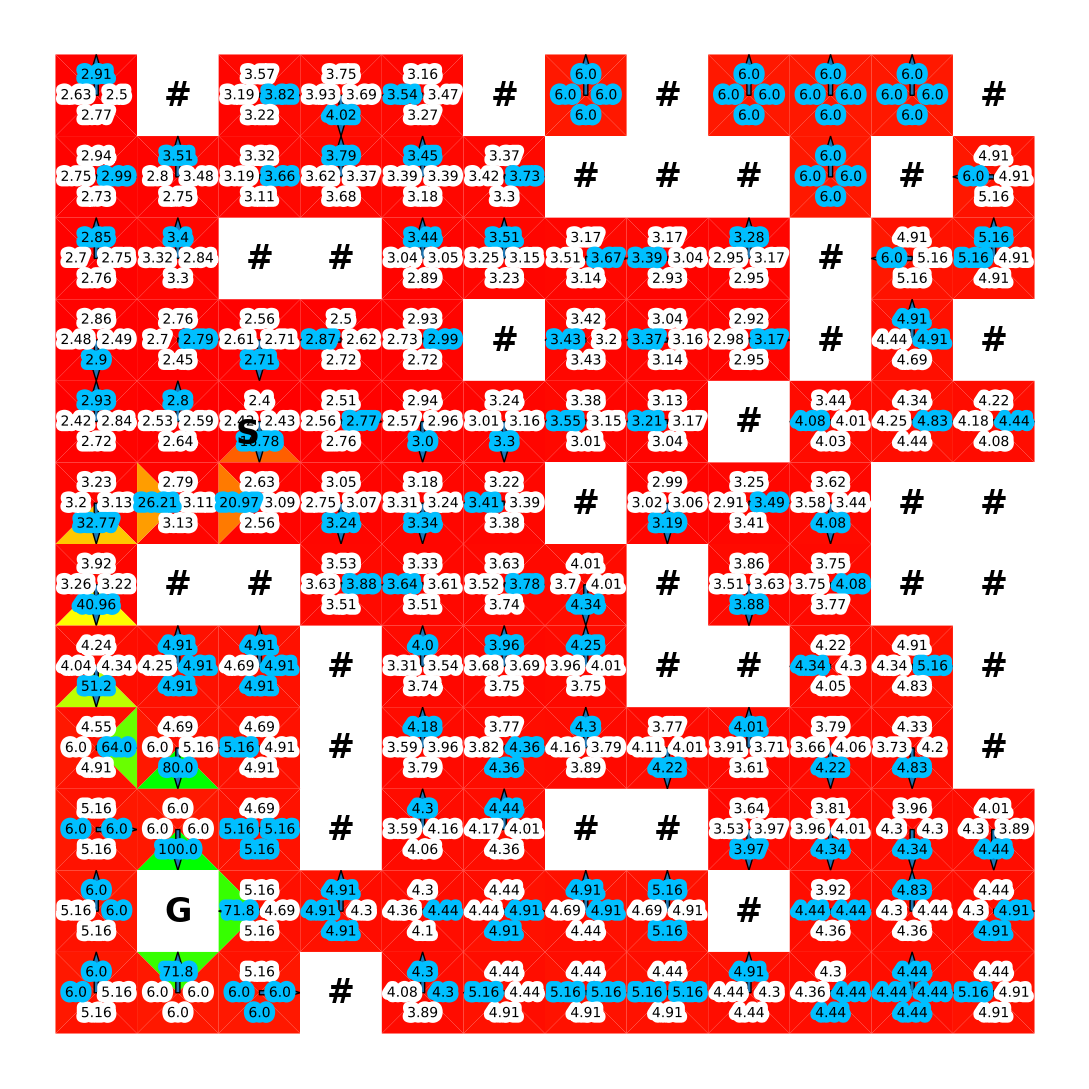

In [13]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.0, mountain=0.3)

lst_Q_table = []
lst_policy = []
lst_rewards = []
lst_steps = []

plt.figure()
for i in range(10):
    Q_table, policy, cummulative_steps, cummulative_rewards = qLearning(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialization=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)

    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_rewards.append(cummulative_rewards)
    lst_steps.append(cummulative_steps)
    plt.plot(cummulative_steps, cummulative_rewards, label=str(i), alpha=0.3)

# Calculate the average cummulative reward and steps over all runs
average_reward = np.mean(lst_rewards, axis=0)
average_steps = np.mean(lst_steps, axis=0)

plt.plot(average_steps, average_reward, label="average", alpha=1.0)
plt.xlabel("Steps")
plt.ylabel("Cumulative reward")
plt.title("Average cumulative reward over steps " + "Q-learning")
plt.legend()
plt.show()

# Check if all policies reach the goal state
index = check_goal_reachable_all_policies(env, lst_policy, "Q-learning")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index[0]], lst_policy[index[0]])
plt.show()